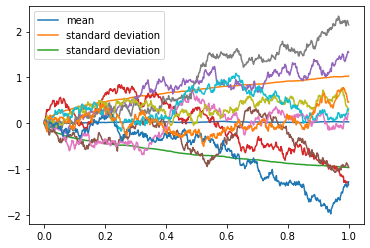

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def brownian(N, seed):
    dt = T/(N) # Time step
    
    np.random.seed(seed)
    
    dz = np.random.normal(loc=0, scale=1, size=N - 1) * np.sqrt(dt)
    path = np.cumsum(dz)
    return np.insert(path, 0, 0)
T = 1
N = 600
n = 1000
seeds = range(0, n)
t = np.linspace(0,T,N)
    
b_arr = np.asarray([brownian(N=600, seed=seed) for seed in seeds])

mean_lst = np.mean(b_arr, axis=0)
std_lst = np.std(b_arr, axis=0)


    
plt.plot(t, mean_lst, label='mean')
plt.plot(t, mean_lst+std_lst, label='standard deviation')
plt.plot(t, mean_lst-std_lst, label='standard deviation')
n_sample = 10
for i, b in enumerate(b_arr[:n_sample - 1]):
    plt.plot(t, b)
    
plt.legend()
plt.show()


# Q2.A

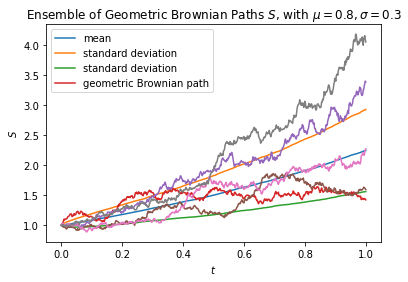

In [5]:
def geometric_brownian(N, mu, sigma, seed):
    
    np.random.seed(seed)
    dt = 1 / N
    S0 = 1
    ds = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(loc=0, scale=np.sqrt(dt), size=N - 1))
    path = S0 * ds.cumprod()
    return np.insert(path, 0, S0)
def graphs(b_arr, mean_lst, std_lst, steps, mu, sigma):
    # plot mean and standard deviation
    plt.plot(steps, mean_lst, label='mean')
    plt.plot(steps, mean_lst+std_lst, label='standard deviation')
    plt.plot(steps, mean_lst-std_lst, label='standard deviation')
   
    # plot 6 sample paths
    n_sample = 6
    for i, b in enumerate(b_arr[0:n_sample - 1]):
        if i == 0:
            plt.plot(steps, b, label='geometric Brownian path')
        else:
            plt.plot(steps, b)

    plt.xlabel('$t$')
    plt.ylabel('$S$')
    plt.title('Ensemble of Geometric Brownian Paths $S$, with $\mu = {}, \sigma = {}$'.format(mu, sigma))
    plt.legend()


N = 600
n_path = 1000
seeds = range(0, n_path)
steps = np.linspace(0, 1, N)

# compute brownian paths
mu = 0.8
sigma = 0.3
b_lst = np.asarray([geometric_brownian(N=N, mu=mu, sigma=sigma, seed=seed) for seed in seeds])
# compute mean and std. of every step
mean_lst = np.mean(b_lst, axis=0)
std_lst = np.std(b_lst, axis=0)
plt.subplot(1,1,1)
graphs(b_lst, mean_lst, std_lst, steps, mu, sigma)

# Q2.B

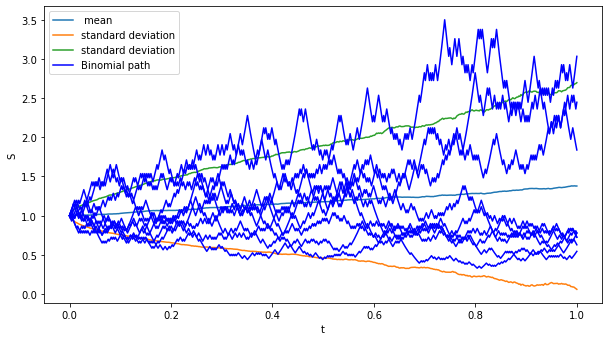

In [6]:
import numpy
def binomial1(N, rp, sigma, S, T, seed):
    
    np.random.seed(seed)
    u = np.exp(sigma * np.sqrt(T / N))
    d = 1 / u
    p = (np.exp(rp * T / N) - d) / (u - d)
    ud = np.random.choice([0, 1], size=(N - 1), p=[1 - p, p])
    dw = (ud == 1) * u + (ud != 1) * d
    path = np.cumprod(dw)
    return np.insert(path, 0, S)
def graphs_(b_arr, mean_lst, std_lst, steps, mu, sigma):
    # plot mean and standard deviation
    plt.plot(steps, mean_lst,  label=' mean')
    plt.plot(steps, mean_lst - std_lst, label='standard deviation')
    plt.plot(steps, mean_lst + std_lst, label='standard deviation')
    # plot 10 sample paths
    n_sample = 10
    for i, b in enumerate(b_arr[0:n_sample - 1]):
        if i == 0:
            plt.plot(steps, b, c='b', label='Binomial path')
        else:
            plt.plot(steps, b, c='b')

    plt.xlabel('t')
    plt.ylabel('S')
    
    plt.legend()



N = 500
T = 1
S = 1
seeds = np.arange(0, 1000)
steps = np.linspace(0, 1, N)

    # compute binomial paths
mu = 0.3
sigma = 0.8
b_arr = np.asarray([binomial1(N=N, rp=mu, sigma=sigma, S=S, T=T, seed=seed) for seed in seeds])
    # compute mean and std. of every step
mean_arr = np.mean(b_arr, axis=0)
std_arr = np.std(b_arr, axis=0)

plt.rc('figure', figsize=(10, 12))

plt.subplot(2, 1, 1)
graphs_(b_arr, mean_arr, std_arr, steps, mu, sigma)





# Q2.C

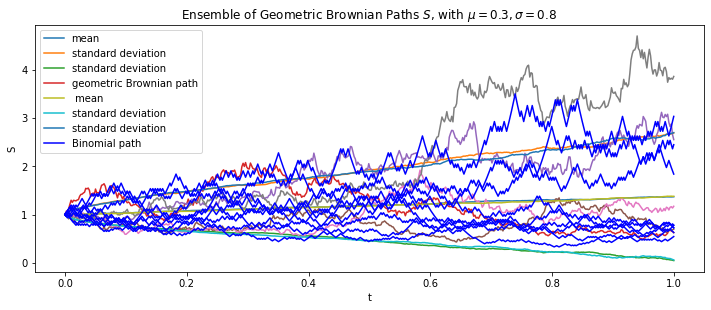

In [7]:

N = 500
n_path = 1000
seeds = range(0, n_path)
steps = np.linspace(0, 1, N)
T = 1
S = 1

    
rp = mu = 0.3
sigma = 0.8
b_lst = np.asarray([geometric_brownian(N=N, mu=mu, sigma=sigma, seed=seed) for seed in seeds])
# computing mean and std. of every step
mean_lst = np.mean(b_lst, axis=0)
std_lst = np.std(b_lst, axis=0)
# computing binomial
b_arr = np.asarray([binomial1(N=N, rp=mu, sigma=sigma, S=S, T=T, seed=seed) for seed in seeds])
# compute mean and std. of every step
mean_arr = np.mean(b_arr, axis=0)
std_arr = np.std(b_arr, axis=0)
plt.rc('figure', figsize=(12, 10))

plt.subplot(2, 1, 1)
graphs(b_lst, mean_lst, std_lst, steps, mu, sigma)
graphs_(b_arr, mean_arr, std_arr, steps, mu, sigma)



# Q3

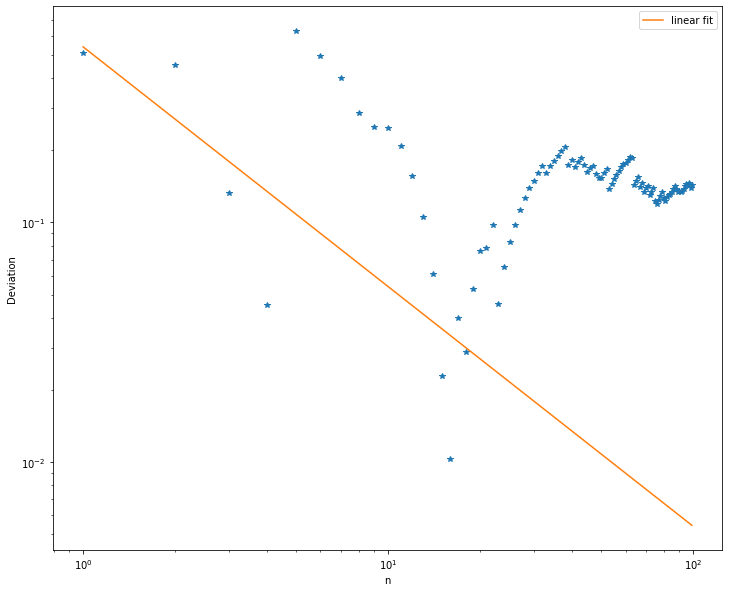

In [9]:
from pylab import *
import numpy
from scipy.stats import norm
def payoff(S, K):
    return np.maximum(0, S - K)
def black_scholes(S, K, sigma, rp, T):
    
    x= (log(S/K)+ (rp+ (sigma**2)/2)*T)/(sigma*numpy.sqrt(T))
    
    return S*norm.cdf(x) - K*numpy.exp(-rp*T)*norm.cdf(x-sigma*numpy.sqrt(T))
def geometric_brownian(N, mu, sigma, seed):
    
    np.random.seed(seed)
    dt = 1 / N
    S0 = 1
    ds = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(loc=0, scale=np.sqrt(dt), size=N - 1))
    path = S0 * ds.cumprod()
    return np.insert(path, 0, S0)
K = 0.7
T = 1
rp = mu = 0.2
sigma = 0.8
S = 1
black_scholes(S, K, sigma, rp, T)
diff_lst = []
    
i_lst = np.array(range(1, 100, 1))

for i in i_lst:
    seeds = np.arange(i)

    S_lst = [geometric_brownian(N=600, mu=mu, sigma=sigma, seed=seed)[-1] for seed in seeds]
    pf_lst = [payoff(S=S, K=K) for S in S_lst]
    pf_mean = np.mean(pf_lst)
    price = pf_mean / np.exp(rp * T)

    diff = np.abs(black_scholes(S, K, sigma, rp, T) - price)
    diff_lst.append(diff)
    diff_lst = []
    i_lst = np.array(range(1,100,1))

    for i in i_lst:
        seeds = np.arange(i)

        
        S_lst = [geometric_brownian(N=600, mu=mu, sigma=sigma, seed=seed)[-1] for seed in seeds]
        
        pf_lst = [payoff(S=S, K=K) for S in S_lst]
        pf_mean = np.mean(pf_lst)
        price = pf_mean / np.exp(rp * T)

        diff = np.abs(black_scholes(S, K, sigma, rp, T) - price)
        diff_lst.append(diff)
plt.plot(i_lst, diff_lst, '*')
plt.loglog(i_lst, 0.54 / i_lst, label='linear fit')
plt.xlabel('n')
plt.ylabel('Deviation')
plt.legend()
plt.show()


# Q4

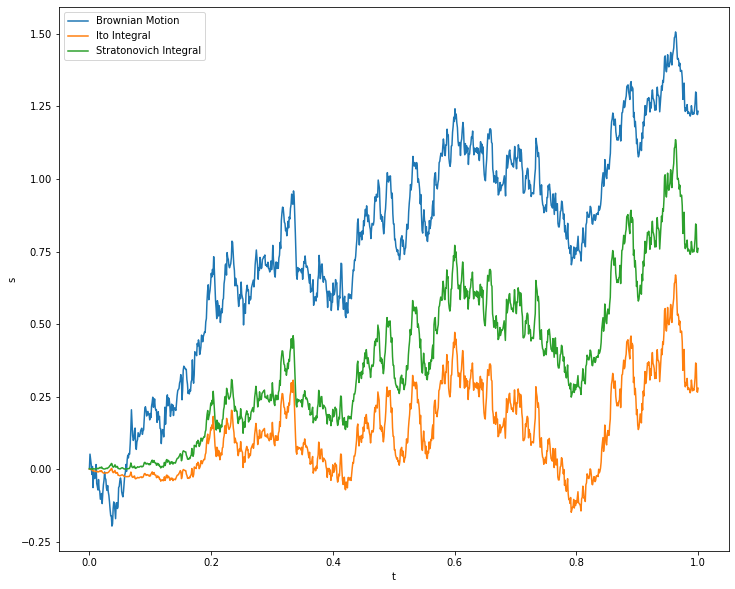

In [10]:
def brownian(N, T, S0, seed):

    np.random.seed(seed)
    dt = T / N
    dz = np.random.normal(loc=0, scale=1, size=N - 1) * np.sqrt(dt)
    dz = np.insert(dz, 0, S0)
    path = np.cumsum(dz)
    return path


def ito(N, T, S0, seed):
    w_t = brownian(N, T, S0=S0, seed=seed)
    w_0 = w_t[0:N - 1]
    w_1 = w_t[1:N]
    Ito = w_0 * (w_1 - w_0)
    return np.cumsum(Ito)


def stratonovich(N, T, S0, seed):
    w_t = brownian(N, T, S0=S0, seed=seed)
    w_0 = w_t[0:N - 1]
    w_1 = w_t[1:N]
    Stratonovich = (w_1 + w_0) / 2 * (w_1 - w_0)
    return np.cumsum(Stratonovich)



N = 1000
T = 1
S0 = 0
seed = 1

w_t = brownian(N=N, T=T, S0=S0, seed=seed)
Ito = ito(N=N, T=T, S0=S0, seed=seed)
Stratonovich = stratonovich(N=N, T=T, S0=S0, seed=seed)

plt.plot(np.linspace(0, T, N), w_t, label='Brownian Motion')
plt.plot(np.linspace(0, T, N - 1), Ito, label='Ito Integral')
plt.plot(np.linspace(0, T, N - 1), Stratonovich, label='Stratonovich Integral')
    
plt.xlabel('t')
plt.ylabel('s')
plt.legend()
    
plt.show()